In [1]:
import argparse
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path
import pickle

from uncertainties import ufloat, unumpy
#import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)


def Read_Pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
        
    return data 

In [8]:
period = "ADE"

var = "ntrk" #ntrk, bdt, newBDT

reweighting_map = {
        "none" : "NoReweighting",
        "quark" : "Reweighting_Quark_Factor",
        "gluon" : "Reweighting_Gluon_Factor"
    }
var_map = {
     "ntrk":'jet_nTracks',
     "bdt":'jet_trackBDT',
     "newBDT":'GBDT_newScore'
    }
    
    
WPs = [0.5, 0.6, 0.7, 0.8]
bin_edges = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
bin_centers = 1/2 * (bin_edges[:-1] + bin_edges[1:])

In [9]:
nominal_SF_path = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")
nominal_SF = Read_Pickle(nominal_SF_path)

#systs_JER = ["syst_JET_JER_EffectiveNP_1__1up","syst_JET_JER_EffectiveNP_2__1up","syst_JET_JER_EffectiveNP_3__1up","syst_JET_JER_EffectiveNP_4__1up","syst_JET_JER_EffectiveNP_5__1up","syst_JET_JER_EffectiveNP_6__1up","syst_JET_JER_EffectiveNP_7__1up","syst_JET_JER_EffectiveNP_8__1up","syst_JET_JER_EffectiveNP_9__1up","syst_JET_JER_EffectiveNP_10__1up","syst_JET_JER_EffectiveNP_11__1up","syst_JET_JER_EffectiveNP_12restTerm__1up"]
#systs = ["syst_JET_EffectiveNP_Modelling1__1up","syst_JET_EffectiveNP_Modelling2__1up","syst_JET_EffectiveNP_Modelling3__1up","syst_JET_EffectiveNP_Modelling4__1up","syst_JET_EffectiveNP_Detector1__1up","syst_JET_EffectiveNP_Detector2__1up","syst_JET_EtaIntercalibration_NonClosure_2018data__1up","syst_JET_EtaIntercalibration_NonClosure_highE__1up","syst_JET_EtaIntercalibration_NonClosure_posEta__1up","syst_JET_EtaIntercalibration_NonClosure_negEta__1up","syst_JET_Flavor_Composition__1up","syst_JET_Flavor_Response__1up","syst_JET_EtaIntercalibration_Modelling__1up","syst_JET_EffectiveNP_Mixed1__1up","syst_JET_EffectiveNP_Mixed2__1up","syst_JET_EffectiveNP_Mixed3__1up","syst_JET_PunchThrough_MC16__1up","syst_JET_Pileup_PtTerm__1up"]

colours = ["g","c","m","y","k","g","c","m","y","k","g","c","m","y","k","g","c","m","y","k"]
SFs = {}
input_folder = Path(f"/eos/user/w/wasu/NewWorkflow/results_CalculateSF/JESJER/")

filelist=sorted(input_folder.rglob(r"syst_JET_*/"))
for dir in filelist:
    #print(dir)
    syst = dir.name
    #print(syst)
    #for file in sorted(dir.glob("syst_JET_*")):
    for file in sorted(dir.rglob(f"ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")):
        #print(file)
        SFs[syst] = Read_Pickle(file)



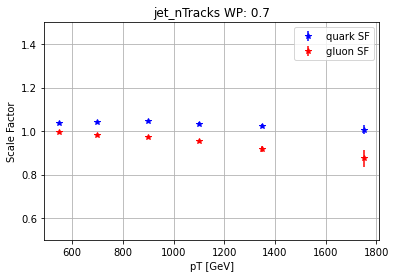

In [10]:
err_syst2 = 0
err_syst2_g = 0
err_syst2_d = 0
err_syst2_g_d = 0
err_tot = 0
err_tot_g = 0

e1 = [0,0]
for WP in WPs:
    fig, ax = plt.subplots()
    SF_quark = nominal_SF[f"{var_map[var]}"][WP]['Quark']
    SF_gluon = nominal_SF[f"{var_map[var]}"][WP]['Gluon']
    #for syst,e in zip(systs, colours):
    for syst in SFs:
        if "up" in syst:
            SF_quark_syst = SFs[syst][f"{var_map[var]}"][WP]['Quark']
            SF_gluon_syst = SFs[syst][f"{var_map[var]}"][WP]['Gluon']

            err_syst = SF_quark_syst - SF_quark
            err_syst_g = SF_gluon_syst - SF_gluon
            err_syst2 += err_syst**2
            err_syst2_g += err_syst_g**2

            err_tot = np.sqrt(unumpy.nominal_values(err_syst2))
            err_tot_g = np.sqrt(unumpy.nominal_values(err_syst2_g))
            
        if "down" in syst:
            SF_quark_syst_d = SFs[syst][f"{var_map[var]}"][WP]['Quark']
            SF_gluon_syst_d = SFs[syst][f"{var_map[var]}"][WP]['Gluon']

            err_syst_d = SF_quark_syst_d - SF_quark
            err_syst_g_d = SF_gluon_syst_d - SF_gluon
            err_syst2_d += err_syst_d**2
            err_syst2_g_d += err_syst_g_d**2

            err_tot_d = np.sqrt(unumpy.nominal_values(err_syst2_d))
            err_tot_g_d = np.sqrt(unumpy.nominal_values(err_syst2_g_d))
            
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_gluon), yerr = err_tot_g, linestyle='none',fmt='none', ecolor='m', marker='.')
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = err_tot, linestyle='none',fmt='none', ecolor='m', marker='.')

        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_gluon), yerr = err_tot_g_d, linestyle='none',fmt='none', ecolor='m', marker='.')
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = err_tot_d, linestyle='none',fmt='none', ecolor='m', marker='.')

    #ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none',label= 'nominal gluon SF',fmt = 'r', marker='*')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none',label= 'quark SF',fmt = 'b', marker='*')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_gluon), yerr = unumpy.std_devs(SF_gluon), linestyle='none',label= 'gluon SF',fmt = 'r', marker='*')

    ax.legend()

    ax.set_title(f"{var_map[var]} WP: {WP}")
    ax.set_xlabel("pT [GeV]")
    ax.set_ylabel("Scale Factor")
    ax.set_ylim(0.5, 1.5)
    ax.grid()
    plt.savefig(f"/eos/user/w/wasu/NewWorkflow/plots/{var_map[var]}_SF_JES_{WP}.pdf")
